# A Notebook to use Decision Tree Classifiers

This notebook shows how to train a decision tree to classify unseen instances.

For those of you interested in understanding the code, it uses predefined functions from the sklearn library of machine learning primitives and from the graphviz library to generate visualizations. A few more details about the code:

* The variable "attributes" stores the names of all features. The variable "instances" stores the values of all features in the training set. The variable "labels" stores the labels of all instances.
* The variable "clf" stores a decision tree model, and it can be trained with "instances" and "labels". Once the model is trained, it can be used to predict unseen instances. We use a type of decision tree algorithm called CART (Classification and Regression Trees).
The variable "n_foldCV" stores the number of times of n-fold cross validation that you input.
* The function "cross_val_scores" assesses the accuracy scores of a decision tree model. Its inputs are "clf", "instances", "labels", "n_foldCV".
* The variable "scores" stores the accuracy of an n-fold cross validation of the model.


Import packages and define a few custom functions

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
import pylab
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm


## Training: Building a Decision Tree Classifier

The cell below asks for a dataset. It trains a decision tree classifier.
We provide two classification datasets that could be applied to the decision tree algorithms.
* "iris.csv" has four attributes with continuous values describing three different iris species.
* "lenses.csv" contains four attributes with discrete values and three classes.

Before training your classifier, run the cell below to take a look at the dataset.

In [2]:
#dataset=input('Please Enter Your Dataset:')
#dataset = "Dataset/iris.csv"
#df=pd.read_csv(dataset)
#display(df)

from sklearn import datasets

iris = datasets.load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The following cell gives the number of instances in all distinct classes.

Label Name is the name of the last column in the dataframe.

In [3]:
#label_name = input('Enter The Label Name:')
label_name = "type of iris plant"
print(iris.target_names)
labels = [iris.target_names[x] for x in iris.target]

['setosa' 'versicolor' 'virginica']


Before we run the following cell, let's learn an important concept called feature encoding. Many classifiers only take numerical data and some datasets have features that are not numerical. For example, a feature can be the state that a person lives in. Those are called [categorical features](https://en.wikipedia.org/wiki/Categorical_variable). In that case,we need to encode categorical features into discrete values. This process is called feature encoding.

In our notebook, if your dataset contains categorical features, you will see the code rules in the cell below. In the next section, when you are prompted to input test set for prediction, the algorithm will automatically encode the relevant categorical features according to the code rules shown below.

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, labels)

## Visualizing a Decision Tree

The following cell will generate a visualization of the decision tree.

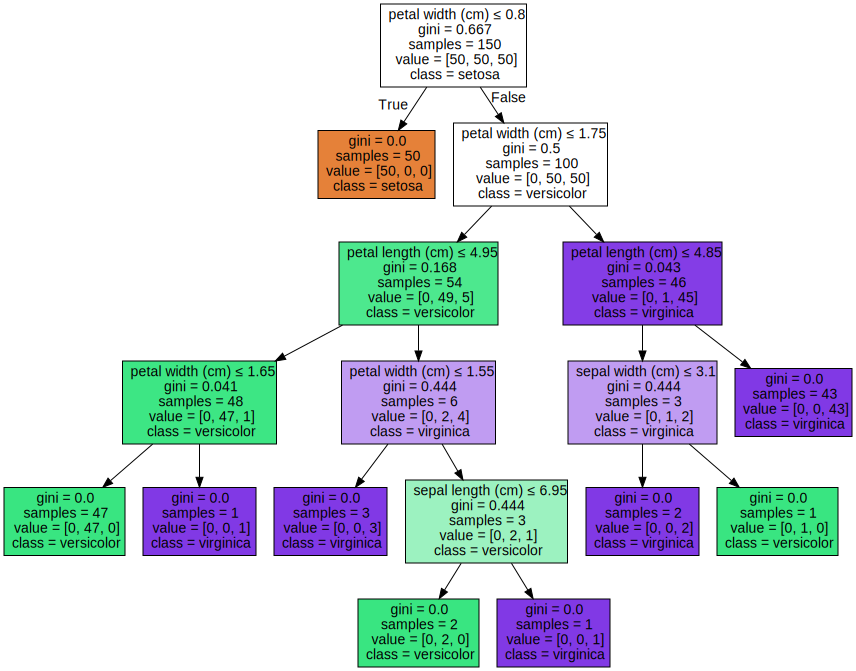

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None,max_depth=5, \
feature_names=iris.feature_names,class_names=clf.classes_,label='all', \
filled=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [6]:
#graph.format = 'png'
#graph.render(filename = "iris_decision_tree")

## Evaluating the Accuracy of a Decision Tree Classifier¶

The following cell will run cross-validation to evaluate your decision tree classifier.

K Fold Cross-Validation is used to estimate prediction error. The dataset is randomly divided into K folds. The first fold acts as the validation set while the method is fit on remaining K-1 folds. Mean Squared Error is calculated on the observations from the held-out fold. The process is repeated K times, taking a different part each time.

![Cross-validation](https://miro.medium.com/max/2000/1*fW_qNKmvmg8duWoQnp_PoQ.png)

In [7]:
#n_foldCV=int(input("Please Enter the Number of Folds:"))
n_foldCV = 4
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(iris.data,iris.target)
scores = cross_val_score(clf, iris.data, labels, cv=n_foldCV)

The following cell will output the accuracy score for each fold and the accuracy estimate of the model under 95% confidence interval.

In [8]:
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9473684210526315
0.9473684210526315
0.8918918918918919
1.0
Accuracy: 0.95 (+/- 0.08)


## Prediction: Classifying New Instances Using a Decision Tree Classifier

The cell below classifies new instances with the decision tree you created.

When you are prompted to input a prediction set, please create an example of an instance that looks like the instances in the training set.

In [9]:
#testset=input('Please Enter Your Prediction Set:')
testset = "5,3,1,0.1"
testset=testset.strip().split(",")
temp=[]
for i in range(len(testset)):
        temp.append(float(testset[i]))
testset=np.array(temp).reshape((1,len(temp)))
predictions=clf.predict(testset)
print(predictions)

[0]


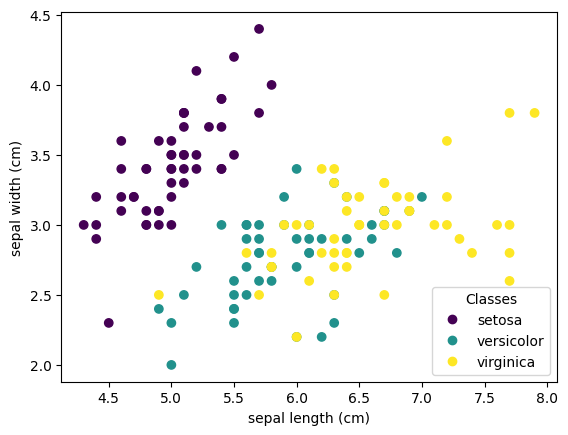

In [10]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [11]:
#n_foldCV=int(input("Please Enter the Number of Folds:"))
n_foldCV = 4
neigh = KNeighborsClassifier(n_neighbors=1)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.9736842105263158
0.9210526315789473
0.9459459459459459
1.0
Accuracy: 0.96 (+/- 0.06)


Let's add some noise and see what happens

In [12]:
iris.data += np.random.normal(0, .5, iris.data.shape)

In [13]:
#n_foldCV=int(input("Please Enter the Number of Folds:"))
n_foldCV = 4
neigh = KNeighborsClassifier(n_neighbors=10)

neigh = neigh.fit(iris.data,iris.target)
scores = cross_val_score(neigh, iris.data, labels, cv=n_foldCV)
print("Scores:")
[print(score) for score in scores]
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Scores:
0.8421052631578947
0.8947368421052632
0.8918918918918919
0.8108108108108109
Accuracy: 0.86 (+/- 0.07)


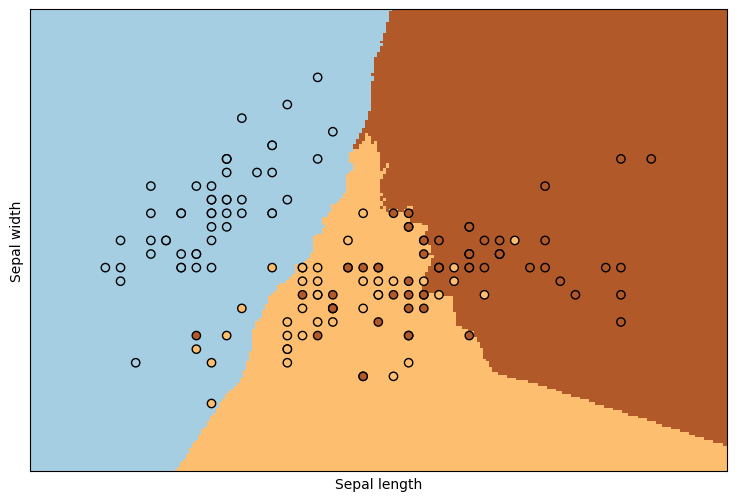

In [19]:
# Code source: Gael Varoqueux
# Modified for Documentation merge by Jaques Grobler
# License: BSD


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target


h = .02 # step size in the mesh

knn=KNeighborsClassifier(n_neighbors=100)

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(9, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()